In [23]:
from bandit import Bandits_final
from mab import UCB, Sliding_UCB

import numpy as np
import matplotlib.pyplot as plt

### First run the standard UCB algorithm and store mean cumulative reward over each experiment

In [27]:
# Instantiate the environment
env = Bandits_final()

# Declare number of experiments and episodes per experiment
experiments = 25
episodes = 2500

# Instantiate the agent
agent = UCB()

# Store cumulative reward per experiment
cumulative_rewards = [[0] for _ in range(experiments)]

# And run the algorithm
for experiment in range(experiments):
    env.reset()
    for episode in range(episodes):
        # Sample action and reward
        action = agent.sample(episode)
        _, reward, _, _, _ = env.step(action)

        # Update agent
        agent.update(action, reward)

        # Store reward
        cumulative_rewards[experiment].append(cumulative_rewards[experiment][-1] + reward)

# Mean over cumulative reward
ucb_mean_cumulative_rewards = [sum(np.array(cumulative_rewards)[:, episode]) / experiments for episode in range(episodes+1)]

### Then run the Sliding window UCB algorithms and store mean cumulative reward over each experiment for those as well

In [25]:
# Instantiate the environment
env = Bandits_final()

# Declare number of experiments and episodes per experiment
experiments = 25
episodes = 2500

# Store hyperparameters per agent
sliding_window_sizes = [10, 25, 50, 100, 250]

# Store cumulative reward per agent
sliding_ucbs_mean_cumulative_rewards = []

for tau in sliding_window_sizes:
    # Store cumulative reward per experiment
    cumulative_rewards = [[0] for _ in range(experiments)]

    # Create an agent
    agent = Sliding_UCB(sliding_window_size=tau)

    # And run the algorithm
    for experiment in range(experiments):
        env.reset()
        for episode in range(episodes):
            # Sample action and reward
            action = agent.sample(episode)
            _, reward, _, _, _ = env.step(action)

            # Update agent
            agent.update(action, reward)

            # Store reward
            cumulative_rewards[experiment].append(cumulative_rewards[experiment][-1] + reward)

    # Mean over cumulative reward
    sliding_ucbs_mean_cumulative_rewards.append([sum(np.array(cumulative_rewards)[:, episode]) / experiments for episode in range(episodes+1)])

### Plot the cumulative rewards for each model

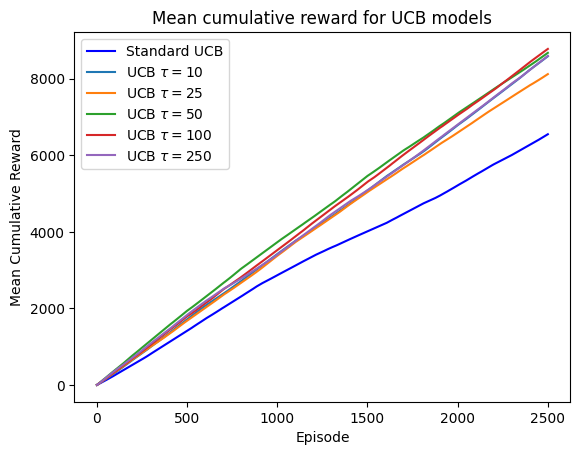

In [28]:
plt.plot(np.arange(episodes+1), ucb_mean_cumulative_rewards, label="Standard UCB", c="b")
for i in range(len(sliding_window_sizes)):
    plt.plot(np.arange(episodes+1), sliding_ucbs_mean_cumulative_rewards[i], label=f"UCB $\\tau={sliding_window_sizes[i]}$")

plt.title("Mean cumulative reward for UCB models")
plt.xlabel("Episode")
plt.ylabel("Mean Cumulative Reward")

plt.legend()
plt.show()